In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [7]:
dataset = pd.read_csv(os.getcwd()+'/Mall_Customers.csv')

In [9]:
X = dataset.iloc[:,[3,4]]

In [ ]:
# using the elbow method to find the optimal number of clusters

In [11]:
from sklearn.cluster import KMeans

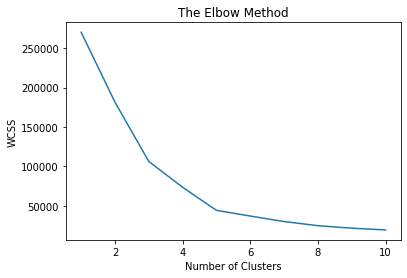

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
# applying kmeans to the mall dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [33]:
y_kmeans = kmeans.fit_predict(X)

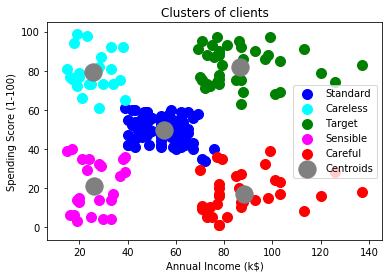

In [69]:
# visualizing the clusters
plt.scatter(np.array(X[y_kmeans == 0])[:,0], np.array(X[y_kmeans == 0])[:,1], s = 100, c = 'blue', label='Standard')
plt.scatter(np.array(X[y_kmeans == 1])[:,0], np.array(X[y_kmeans == 1])[:,1], s = 100, c = 'cyan', label='Careless')
plt.scatter(np.array(X[y_kmeans == 2])[:,0], np.array(X[y_kmeans == 2])[:,1], s = 100, c = 'green', label='Target')
plt.scatter(np.array(X[y_kmeans == 3])[:,0], np.array(X[y_kmeans == 3])[:,1], s = 100, c = 'magenta', label='Sensible')
plt.scatter(np.array(X[y_kmeans == 4])[:,0], np.array(X[y_kmeans == 4])[:,1], s = 100, c = 'red', label='Careful')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],  s =300, c = 'grey', label='Centroids')

plt.title("Clusters of clients")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()